In [1]:
import cv2
import numpy as np
from scipy import signal,misc
from matplotlib import pyplot as plt
from skimage import measure

In [2]:
img = cv2.imread('segmentation_WBC-master/Dataset 1/001.bmp')
label_img = cv2.imread('segmentation_WBC-master/Dataset 1/001.png')

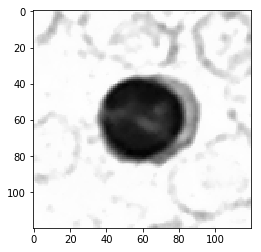

In [3]:
label_img = cv2.cvtColor(label_img,cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

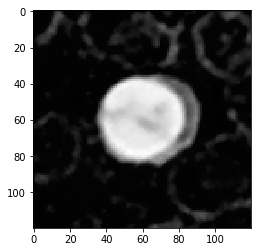

In [4]:
reverse_img = cv2.bitwise_not(img)
plt.imshow(reverse_img,cmap='gray')

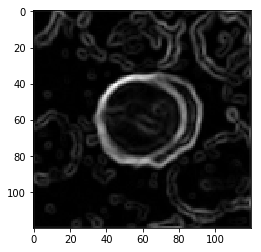

In [5]:
Wx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
Wy = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
conWx = signal.convolve2d(reverse_img, Wx, mode='same')
conWy = signal.convolve2d(reverse_img, Wy, mode='same')
magnitude_grad = np.sqrt(conWx**2+conWy**2)
plt.imshow(magnitude_grad,cmap='gray')

In [21]:
from skimage.filters import threshold_otsu, threshold_local
from scipy import ndimage
image = magnitude_grad

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh


ndimage.binary_fill_holes(binary_global).astype(int)

plt.imshow(binary_global,cmap='gray')
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

C:\Users\58011256\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\58011256\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Users\58011256\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


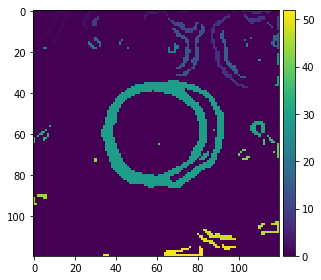

In [17]:
from skimage.measure import label, regionprops
from skimage.io import imread , imshow
label_img = label(binary_global)
props = regionprops(label_img)
imshow(label_img)